In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
#pip install split-folders[full]

In [ ]:
#import splitfolders

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/Datasets/plant_village_remaining', output="/content/drive/MyDrive/Datasets/plant_village_keras", seed=1337, ratio=(.8, 0.1,0.1))

Streaming output truncated to the last 5000 lines.
Copying files: 21398 files [14:18, 60.55 files/s]
Copying files: 21406 files [14:18, 65.56 files/s]
Copying files: 21413 files [14:18, 56.40 files/s]
Copying files: 21422 files [14:18, 62.90 files/s]
Copying files: 21429 files [14:18, 62.36 files/s]
Copying files: 21436 files [14:19, 61.96 files/s]
Copying files: 21443 files [14:19, 61.76 files/s]
Copying files: 21451 files [14:19, 66.48 files/s]
Copying files: 21459 files [14:19, 69.73 files/s]
Copying files: 21467 files [14:19, 69.07 files/s]
Copying files: 21475 files [14:19, 71.87 files/s]
Copying files: 21483 files [14:19, 70.88 files/s]
Copying files: 21491 files [14:19, 71.30 files/s]
Copying files: 21499 files [14:19, 66.36 files/s]
Copying files: 21506 files [14:21, 14.38 files/s]
Copying files: 21511 files [14:22,  9.88 files/s]
Copying files: 21515 files [14:23,  7.96 files/s]
Copying files: 21515 files [14:37,  7.96 files/s]
Copying files: 21516 files [14:38,  1.10s/ files]

In [ ]:
train_path='/content/drive/MyDrive/Datasets/plant_village_keras/train'
test_path='/content/drive/MyDrive/Datasets/plant_village_keras/test'
val_path='/content/drive/MyDrive/Datasets/plant_village_keras/val'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 24297 images belonging to 38 classes.
Found 2904 images belonging to 38 classes.
Found 2929 images belonging to 38 classes.


In [ ]:
imgs, labels= next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

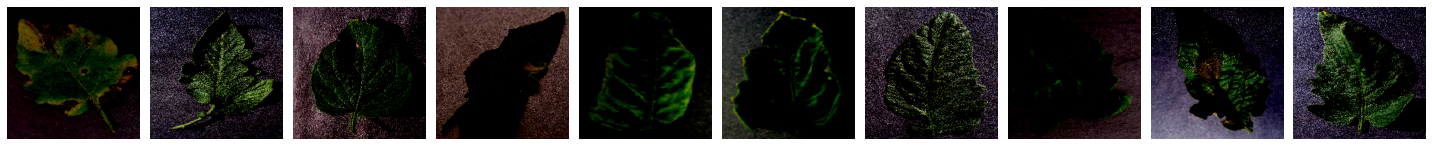

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(units=2, activation='softmax')
# ])

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output

In [ ]:
hidden=tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
output = Dense(units=38, activation='softmax')(hidden)

In [ ]:
model =Model(inputs=mobile.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
history=model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Epoch 1/10
1453/1453 [==============================] - 3977s 3s/step - loss: 0.3122 - accuracy: 0.9024 - val_loss: 0.1189 - val_accuracy: 0.9619
Epoch 2/10
1453/1453 [==============================] - 103s 71ms/step - loss: 0.0900 - accuracy: 0.9725 - val_loss: 0.1103 - val_accuracy: 0.9614
Epoch 3/10
1453/1453 [==============================] - 103s 71ms/step - loss: 0.0563 - accuracy: 0.9832 - val_loss: 0.0986 - val_accuracy: 0.9675
Epoch 4/10
1453/1453 [==============================] - 103s 71ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.1093 - val_accuracy: 0.9702
Epoch 5/10
1453/1453 [==============================] - 103s 71ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0694 - val_accuracy: 0.9807
Epoch 6/10
1453/1453 [==============================] - 101s 69ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0692 - val_accuracy: 0.9829
Epoch 7/10
1453/1453 [==============================] - 101s 70ms/step - loss: 0.0186 - accuracy: 0.9948 - val_loss: 0.

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

183/183 [==============================] - 454s 2s/step


In [ ]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
test_batches.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization


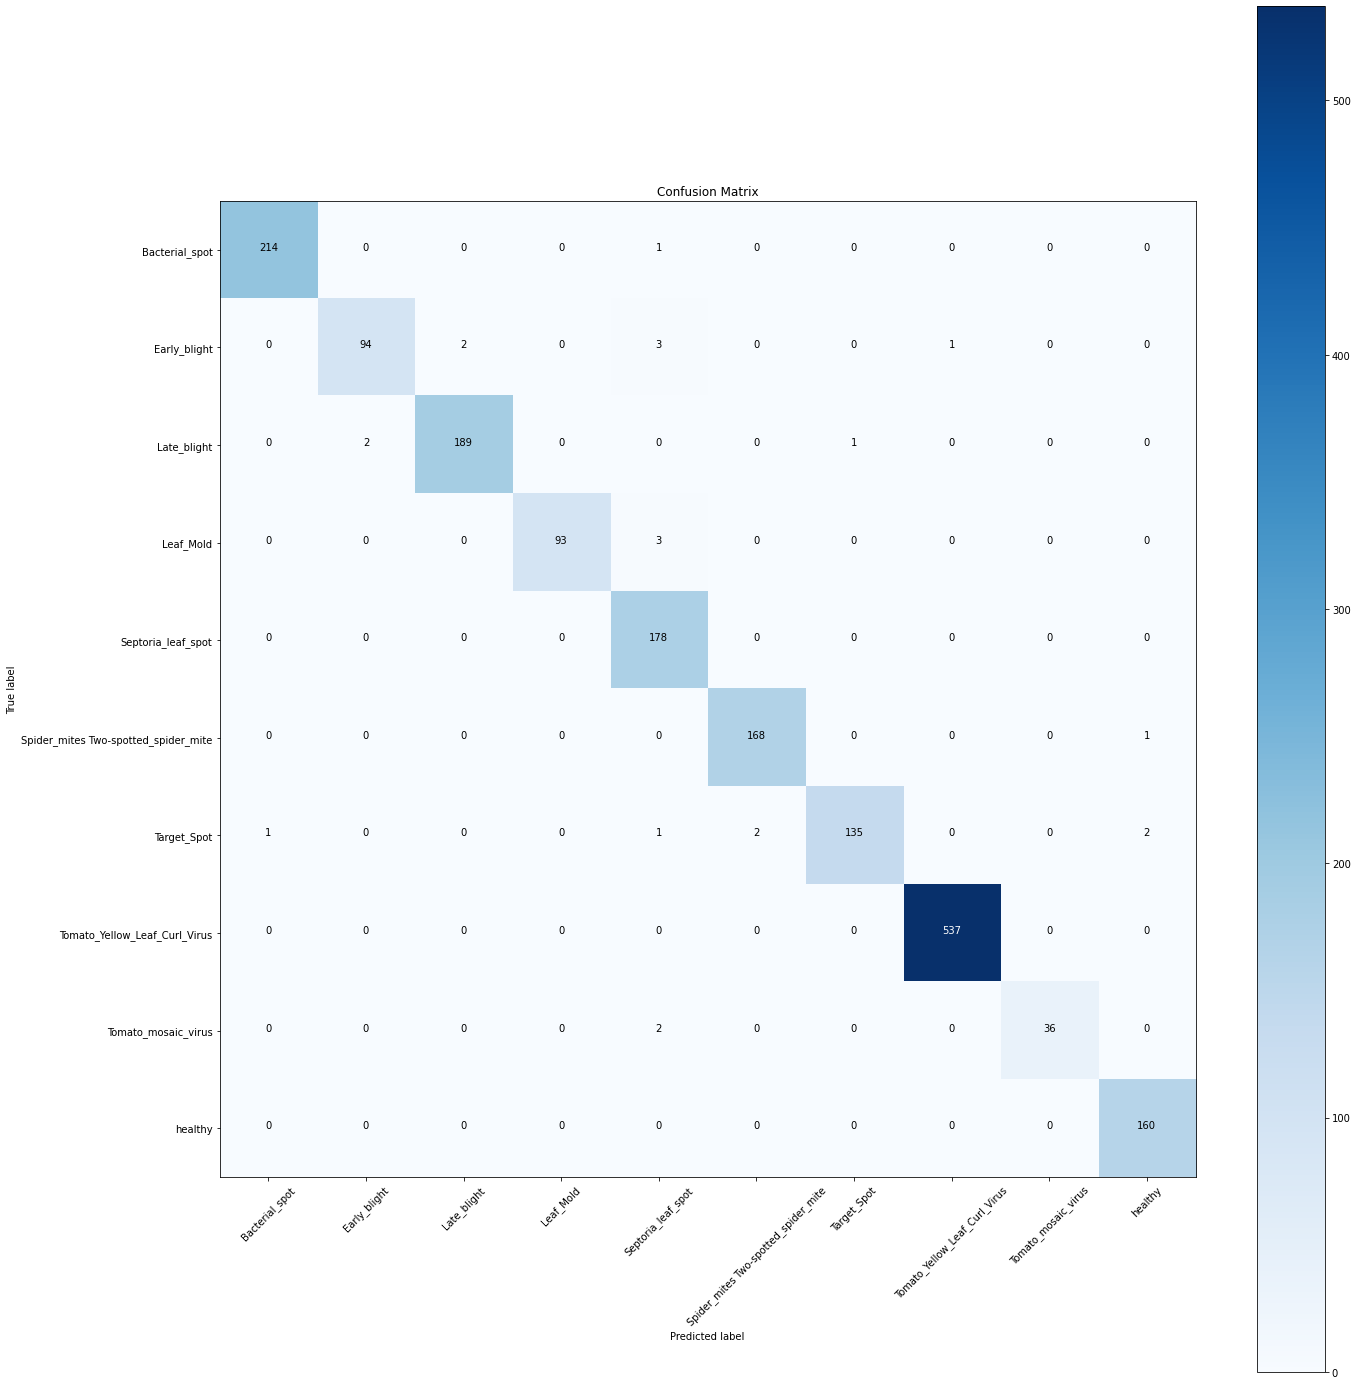

In [ ]:
#CHANGE HOBE
#cm_plot_labels = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot','Tomato_Yellow_Leaf_Curl_Virus','Tomato_mosaic_virus','healthy']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
score=model.evaluate(test_batches)

183/183 [==============================] - 11s 58ms/step - loss: 0.0312 - accuracy: 0.9880


In [ ]:
model.save('/content/drive/MyDrive/Models/Model_remaining')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Model_tomato_anuva/assets


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

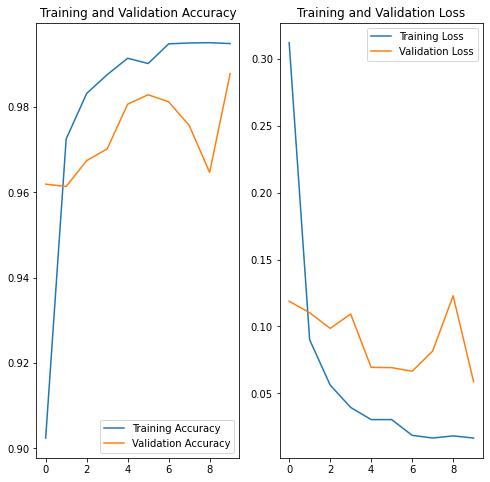

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()